![uwm_logo1_pl.svg](https://uwm.edu.pl/sites/default/files/2023-01/uwm_logo_poziome_PL.png)

# Symulacje komputerowe
## Laboratorium 04 - Równania różniczkowe i różnicowe
**mgr inż. Adam Zalewski**<br>
na podstawie materiałów **dra inż. Mariusza Bodziocha**

**Zadanie 0.** Zaimportuj niezbędne biblioteki.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


### Wzrost logistyczny
Wzrost logistyczny liczebności populacji opisany jest równaniem

$$\dot{y}=\frac{dy}{dt}=ry(1-y)$$

gdzie $r$ jest parametrem. Sprowadzenie tego równania do postaci różnicowej jest następujące:
$$\frac{dy}{dt}\approx\frac{y_{n+1}-y_n}{\Delta t}$$
Podstawiając w równaniu za $\frac{dy}{dt}$ wyrażenie po prawej stronie otrzymujemy:
$$\frac{y_{n+1}-y_n}{\Delta t}=ry_n(1-y_n)$$
Gdzie odpowiednio przekształcając otrzymujemy:
$$y_{n+1}=y_n+r\Delta ty_n(1-y_n)$$

Równanie
$$y_{n+1}=y_n+rhy_n(1-y_n)$$

reprezentuje wersję różnicową równania logistycznego, gdzie $h>0$ jest krokiem dyskretyzacji.

**Zadanie 1.** Zaimplementuj funkcję <code>def logistic_equation(t, state, r)</code>, która zwraca tablicę obliczonych pochodnych $\frac{dy}{dt}$

In [2]:
def logistic_equation(t, state, r):
    y = state
    dy = r * y * (1 - y)
    return [dy]
    

**Zadanie 2.** Zaimplementuj funkcję <code>def difference_equation(r, y0, h, n)</code> - gdzie $n$ to ilość iteracji - obliczającą kolejne interacje wersji różnicowej równania logistycznego.

In [3]:
def difference_equation(r, y0, h, n):
    y = np.zeros(n+1)
    y[0] = y0
    for t in range(n):
        y[t+1] = y[t] + h * r * y[t] * (1 - y[t])
    return y

**Zadanie 3.** Korzystając z solvera **RK45** znaleźć rozwiązanie równania logistycznego dla $y(0)=0.5$ i $r=1.1$. Porównać otrzymane rozwiązanie z rozwiązaniem równania różnicowego dla kroku $h=0.01$, $h=0.1$ i $h=0.5$. Ustawić $n=50$ oraz $t=0,\dots,50$.

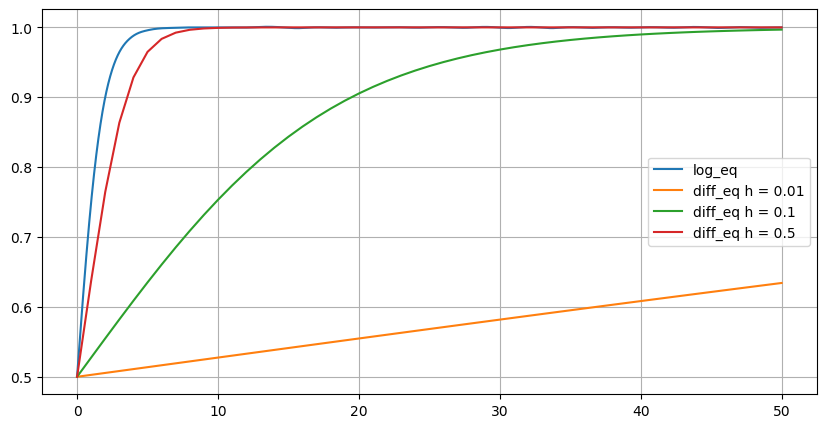

In [4]:
y0 = 0.5
r = 1.1
h_values = [0.01, 0.1, 0.5]
n = 50

t_span = (0, n)
t_eval = np.linspace(*t_span, 10000)

plt.figure(figsize = (10, 5))

log_eq = solve_ivp(logistic_equation, t_span, [y0], args = (r, ),
                   t_eval = t_eval, method = "RK45")

plt.plot(log_eq.t, log_eq.y[0], label = "log_eq")
for h in h_values:
    diff_eq = difference_equation(r, y0, h, n)
    plt.plot(range(n+1), diff_eq, label = f"diff_eq h = {h}")
    
plt.legend()
plt.grid()
plt.show()


**Zadanie 4.** Porównać dynamikę równania logistycznego z równaniem różnicowym dla $r = [3,\ 3.2,\ 3.5,\ 3.9]$ oraz dla kroku $h = \frac{r−1}{r}$ i $h=\frac{1}{r}$. Ustawić $n = 10$ oraz $t=0,\dots,10$. Zinterpretować wyniki.

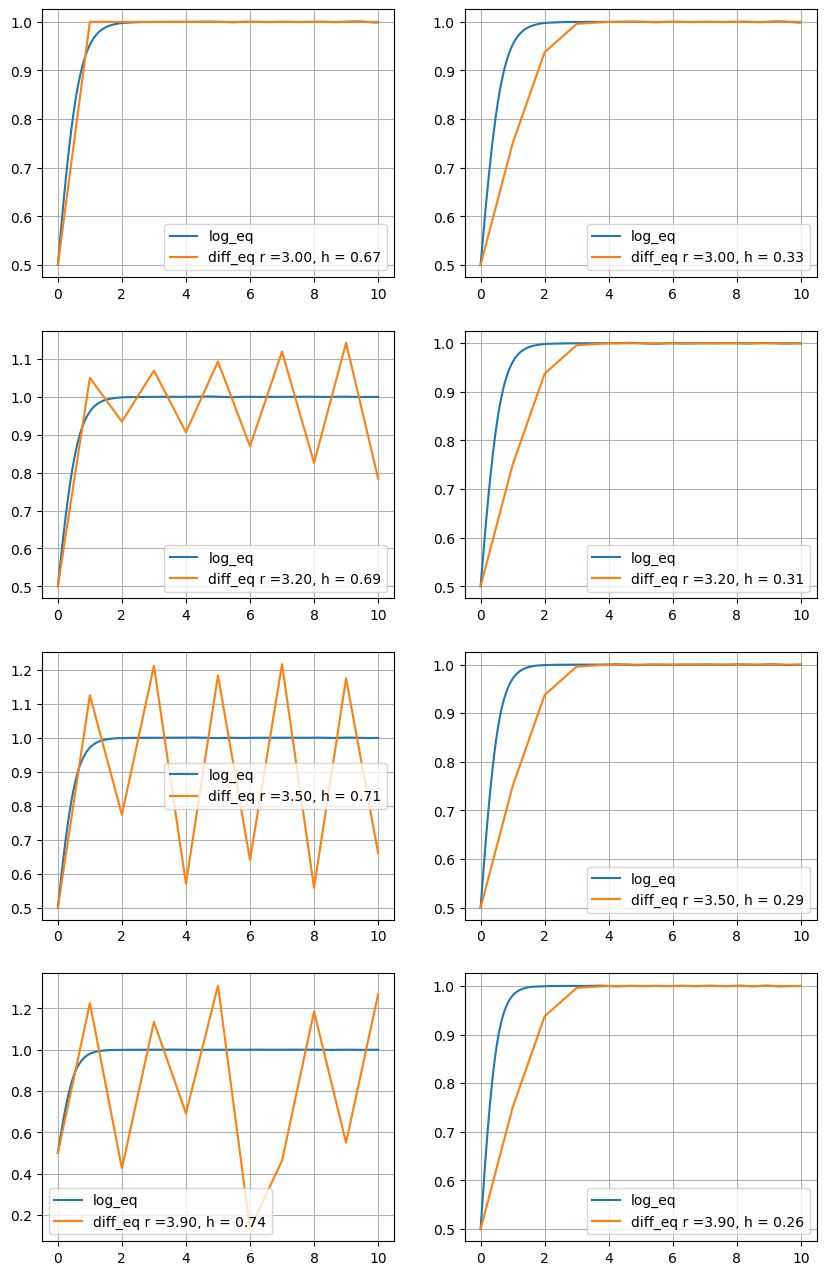

In [5]:
n = 10 
r_values = [3, 3.2, 3.5, 3.9]
y0 = 0.5

t_span = (0, n)
t_eval = np.linspace(*t_span, 10000)
fig, ax = plt.subplots(len(r_values), 2, figsize = (10, 16))

for i, r in enumerate(r_values):
    h_values = [(r-1)/r, 1/r]
    for j, h in enumerate(h_values):
        log_eq = solve_ivp(logistic_equation, t_span, [y0], args = (r, ),
                   t_eval = t_eval, method = "RK45")
        ax[i][j].plot(log_eq.t, log_eq.y[0], label = "log_eq")
        
        diff_eq = difference_equation(r, y0, h, n)
        ax[i][j].plot(range(n+1), diff_eq, label = f"diff_eq r ={r:.2f}, h = {h:.2f}")
        ax[i][j].legend()
        ax[i][j].grid()
        
plt.show()
        

**Zadanie 5.** Zaimplementuj funkcję <code>def zad5(t, state)</code>, która zwraca tablicę obliczonych pochodnych $\frac{dy}{dt}$ równania:
$$\dot{y}=\frac{dy}{dt}=\frac{2y-y^3e^{t}}{7}$$

In [6]:
def zad5(t, state):
    y = state
    dy = (2*y - y ** 3 * np.exp(t)) / 7

**Zadanie 6.** Zamodelować zachowanie się krzywych całkowych równania z zadania 5 dla $t\in[0,15]$, z warunkiem początkowym $y(0)=y_0$, gdzie $y_0=-1,-0.8,-0.6,\dots,1$.

In [ ]:
y0_values = np.linspace(-1, 1, 11)
t_span = (0, 15)
t_eval = np.linspace(*t_span, 10000)

plt.figure(figsize = (10, 5))

for y0 in y0_values:
    zad5_eq = solve_ivp(zad5, t_span, [y0],t_eval = t_eval, method = "RK45")
    plt.plot(zad5_eq.t, zad5_eq.y[0], label = f"y0 = {y0}")
    
plt.legend(loc = 'right')
plt.grid()
plt.show()

**Zadanie 7.** W jednym oknie graficznym wygenerować wykres rozwiązania zadania 5 otrzymanego za pomocą solverów **RK23** i **RK45** z warunkiem początkowym $y(0) = 0.5$. Porównać wyniki dla tolerancji błędu $rtol=[1,\ 0.1,\ 0.01,\ 0.001]$ oraz $max\_step=[\infty,\ 10,\ 5,\ 0.1]$.

**Zadanie 8.** Zaimplementuj funkcję <code>def zad8(t, state)</code>, która zwraca tablicę obliczonych pochodnych $\frac{dx}{dt}$ oraz $\frac{dy}{dt}$ układu równań:
$$\left\{\begin{array}{l}
\dot{x}=\frac{dx}{dt}=x^2-xy+y^2\\
\dot{y}=\frac{dy}{dt}=x^3-y^3\end{array}\right.$$

**Zadanie 9.** Wygenerować wykresy rozwiązań układu z warunkami początkowymi $x(0) = 1$, $y(0) = −1$ w przedziale $[0, 2\pi]$. 

**Zadanie 10.** Na podstawie zadania 8 wygenerować trajektorię rozwiązań z zadania 9 w przestrzeni fazowej $\mathbb{R}^2$.

**Zadanie 11.** Na podstawie zadania 8 oraz zadania 9 utworzyć portret fazowy z wykorzystaniem <code>plt.streamplot()</code>. Ustawić <code>x0 = range(0, 4)</code> oraz <code>y0 = range(-5, 6)</code>.

### Model Malthusa
Najprostszy model wykładniczy rozwoju pojedynczej populacji otrzymuje się zakładając, że populacja ma warunki nieograniczonego rozwoju, w tym np. że każdy osobnik ma nieograniczony dostęp do pożywienia i miejsc lęgowych. Przyjmuje się ponadto, że wszystkie osobniki są równomiernie rozlokowane przestrzennie i jednakowe — są zdolne do partenogenezy i wydają na świat regularnie tyle samo potomków. W takim abstrakcyjnym przypadku średnią liczebność populacji $N(t)$ (w chwili $t$) można obliczyć z zależności

$$N'(t)=rN(t)$$

gdzie $r$ oznacza współczynnik rozrodczości netto dla populacji $N$ (różnica między
współczynnikiem rozrodczości a śmiertelności).

**Zadanie 12.** Zaimplementuj funkcję <code>def malthus(t, state, r)</code>, która zwraca tablicę obliczonych pochodnych $\frac{dN}{dt}$.

**Zadanie 13.** Za pomocą metody **RK45** przeanalizuj powyższe równanie dla $N(0) = 100$ i
$r > 0$, $r = 0$ oraz $r < 0$.

**Zadanie 14.** Dla ustalonego $r > 0$ i $N(0) = 100$ wyznaczyć czas $t$, w którym rozwiązanie
$N(t) \geq a$.